### Importing the libararies

In [1]:
import fastai
import fastai.vision
from fastai.vision.all import *
import torch
import torchvision
import pandas as pd
import os

In [2]:
os.chdir('..')

* Loading the csv file

In [3]:
df=pd.read_csv('useful-csvs/refined-full.csv')

* Making lables out of Style and Class

In [5]:
train_df=df[['paths','style','CLASS']].copy()

In [6]:
len(train_df)

730152

In [7]:
train_df['STYLcATG']=train_df['style']+','+train_df['CLASS']

In [8]:
train_df

,paths,style,CLASS,STYLcATG
0,5e9144890d5d975b_4-1795.jpg,Transitional,Benches,"Transitional,Benches"
1,d591fd080bbbd19e_4-5553.jpg,Industrial,Tables,"Industrial,Tables"
2,8d9153490f485614_4-9191.jpg,Transitional,Chairs,"Transitional,Chairs"
3,b831bf6c0eb29e50_4-6346.jpg,Industrial,Hutches,"Industrial,Hutches"
4,9bc1ae0207d84cf9_4-0688.jpg,Contemporary,Glasses,"Contemporary,Glasses"
...,...,...,...,...
730147,1ca118940f04c035_4-7577.jpg,Transitional,Consoles,"Transitional,Consoles"
730148,7291989e0ba2192a_4-6090.jpg,Contemporary,Stools,"Contemporary,Stools"
730149,7a819c1c0b4f86a8_4-7837.jpg,Transitional,Tables,"Transitional,Tables"
730150,2831da6a0f906bdc_4-3388.jpg,Modern,Chairs,"Modern,Chairs"


In [9]:
len(train_df['STYLcATG'].unique())

1302

### Top 30, are quite dense, so putting this as threshold

In [ ]:
train_df['STYLcATG'].value_counts()[:30]

In [22]:
selected_cats = (train_df.groupby('STYLcATG')['paths'].count().sort_values(ascending=False)[:30]).index

In [24]:
mapping_df = train_df[train_df['STYLcATG'].isin(selected_cats)]
len(mapping_df)

388143

## We need to make it balanced

## Best to make a balanced data, 

In [25]:
#mapping_df=train_df.copy()
#mapping_df = mapping_df[mapping_df['STYLcATG']=='Transitional,Chairs'].reset_index(drop=True)
g=mapping_df.copy()
g = g.groupby(['STYLcATG'])

g=pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))


In [19]:
g.head()

,,paths,style,CLASS,STYLcATG
STYLcATG,,,,,
"Asian,Accessories",0,41f14056040cd778_4-7008.jpg,Asian,Accessories,"Asian,Accessories"
"Asian,Aprons",0,4ff1d34f089b3fd9_4-3593.jpg,Asian,Aprons,"Asian,Aprons"
"Asian,Baskets",0,17010cd60ac6667a_4-7659.jpg,Asian,Baskets,"Asian,Baskets"
"Asian,Beds",0,33f1851106902164_4-3096.jpg,Asian,Beds,"Asian,Beds"
"Asian,Benches",0,be315f9a0f062a19_4-5557.jpg,Asian,Benches,"Asian,Benches"


In [26]:
g['STYLcATG'].value_counts()

Contemporary,Hutches       5142
Midcentury,Tables          5142
Traditional,Chairs         5142
Traditional,Tables         5142
Contemporary,Sofas         5142
Modern,Sets                5142
Contemporary,Vents         5142
Transitional,Sets          5142
Contemporary,Tables        5142
Transitional,Beds          5142
Contemporary,Sinks         5142
Midcentury,Loveseats       5142
Contemporary,Chairs        5142
Contemporary,Stools        5142
Contemporary,Beds          5142
Midcentury,Sofas           5142
Industrial,Tables          5142
Tropical,Sets              5142
Transitional,Sofas         5142
Transitional,Headboards    5142
Transitional,Benches       5142
Contemporary,Sets          5142
Transitional,Stools        5142
Transitional,Tables        5142
Traditional,Beds           5142
Midcentury,Chairs          5142
Transitional,Chairs        5142
Contemporary,Tile          5142
Contemporary,Faucets       5142
Transitional,Consoles      5142
Name: STYLcATG, dtype: int64

In [27]:
final_training_df=g[['paths','STYLcATG']].copy()

In [31]:
len(final_training_df)

154260

In [28]:
mapping_df=final_training_df.copy()
mapping_df.loc[mapping_df.sample(int(len(mapping_df)/5)).index,'is_valid'] = True

In [29]:
mapping_df['is_valid'] = mapping_df['is_valid'].fillna(False)


In [30]:
dls=ImageDataLoaders.from_df(mapping_df,path='TOTAL-DATA/full-data/',label_col=1,item_tfms=Resize(224),valid_col='is_valid')

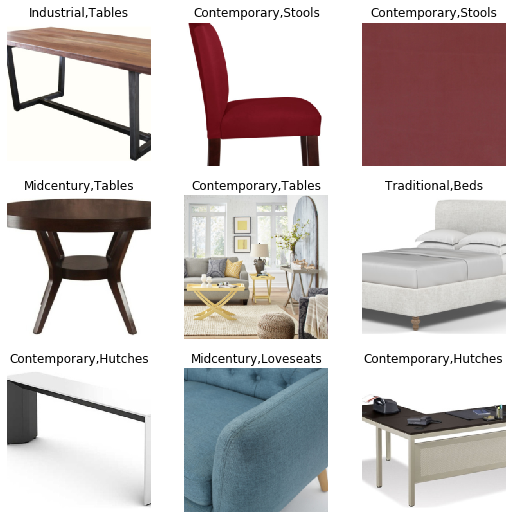

In [35]:
dls.show_batch(max_n=9)

In [36]:
model = fastai.vision.models.vgg19_bn


In [37]:
learn = cnn_learner(dls,model, metrics=error_rate)#, metrics=partial(accuracy_multi, thresh=0.5)

In [38]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.537878,1.245768,0.381596,10:05


epoch,train_loss,valid_loss,error_rate,time
0,0.994960,0.869643,0.271522,13:23
1,0.684524,0.694021,0.221412,13:22


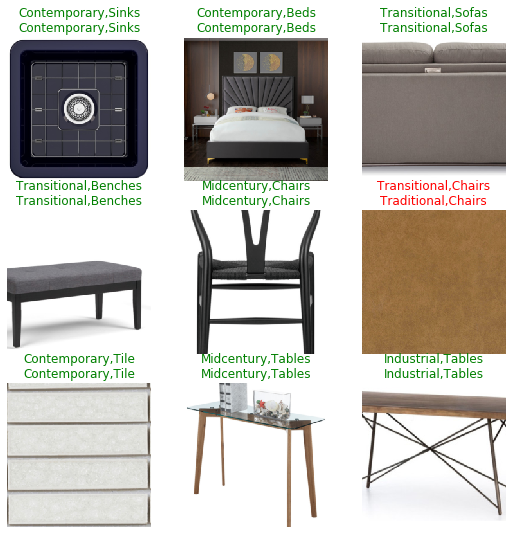

In [39]:
learn.show_results()